In [22]:
import pandas as pd
import country_list
import numpy as np
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import pmdarima as pm


In [5]:
f1 = "WHO-COVID-19-global-data-up.csv"
df = pd.read_csv(f1)

In [6]:
df

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0
...,...,...,...,...,...,...,...,...
210214,2022-06-03,ZW,Zimbabwe,AFRO,177,253051,1,5508
210215,2022-06-04,ZW,Zimbabwe,AFRO,185,253236,1,5509
210216,2022-06-05,ZW,Zimbabwe,AFRO,102,253338,1,5510
210217,2022-06-06,ZW,Zimbabwe,AFRO,59,253397,2,5512


In [36]:
df.set_index("Date_reported")

,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
Date_reported,,,,,,,
2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
2020-01-07,AF,Afghanistan,EMRO,0,0,0,0
...,...,...,...,...,...,...,...
2022-06-03,ZW,Zimbabwe,AFRO,177,253051,1,5508
2022-06-04,ZW,Zimbabwe,AFRO,185,253236,1,5509
2022-06-05,ZW,Zimbabwe,AFRO,102,253338,1,5510


In [66]:
code = df["Country_code"].unique()
code = np.delete(code,143 )

In [67]:
code

array(['AF', 'AL', 'DZ', 'AS', 'AD', 'AO', 'AI', 'AG', 'AR', 'AM', 'AW',
       'AU', 'AT', 'AZ', 'BS', 'BH', 'BD', 'BB', 'BY', 'BE', 'BZ', 'BJ',
       'BM', 'BT', 'BO', 'XA', 'BA', 'BW', 'BR', 'VG', 'BN', 'BG', 'BF',
       'BI', 'CV', 'KH', 'CM', 'CA', 'KY', 'CF', 'TD', 'CL', 'CN', 'CO',
       'KM', 'CG', 'CK', 'CR', 'CI', 'HR', 'CU', 'CW', 'CY', 'CZ', 'KP',
       'CD', 'DK', 'DJ', 'DM', 'DO', 'EC', 'EG', 'SV', 'GQ', 'ER', 'EE',
       'SZ', 'ET', 'FK', 'FO', 'FJ', 'FI', 'FR', 'GF', 'PF', 'GA', 'GM',
       'GE', 'DE', 'GH', 'GI', 'GR', 'GL', 'GD', 'GP', 'GU', 'GT', 'GG',
       'GN', 'GW', 'GY', 'HT', 'VA', 'HN', 'HU', 'IS', 'IN', 'ID', 'IR',
       'IQ', 'IE', 'IM', 'IL', 'IT', 'JM', 'JP', 'JE', 'JO', 'KZ', 'KE',
       'KI', 'XK', 'KW', 'KG', 'LA', 'LV', 'LB', 'LS', 'LR', 'LY', 'LI',
       'LT', 'LU', 'MG', 'MW', 'MY', 'MV', 'ML', 'MT', 'MH', 'MQ', 'MR',
       'MU', 'YT', 'MX', 'FM', 'MC', 'MN', 'ME', 'MS', 'MA', 'MZ', 'MM',
       'NR', 'NP', 'NL', 'NC', 'NZ', 'NI', 'NE', 'N

In [71]:
dates = []
for cd in code:
    data = df[df.Country_code == cd]
    dates.append(data.iloc[0][0])


In [76]:
# function to get unique values
def unique(list1):
  
    # initialize a null list
    unique_list = []
      
    # traverse for all elements
    for x in list1:
        # check if exists in unique_list or not
        if x not in unique_list:
            unique_list.append(x)
    # print list
    for x in unique_list:
        print(x)

unique(dates)

2020-01-03


In [69]:
days_cases = 0
days_deaths = 0
for cd in code:
    data = df[df.Country_code == cd]
    try:
        idx_conf = (data.Cumulative_cases != 0).argmax()
        idx_deat = (data.Cumulative_deaths != 0).argmax()
        if days_cases < idx_conf:
            days_cases = idx_conf
        if days_deaths < idx_deat:
            days_deaths = idx_deat
    except:
        print(cd)

In [70]:
print("Cases:",days_cases)
print("Deaths:",days_deaths)

Cases: 871
Deaths: 843


In [80]:
Begindatestring = "2020-01-03"
Begindate = datetime.strptime(Begindatestring, "%Y-%m-%d")
print("Date all Countries start from: ")
print(Begindate)
start_cases = Begindate + timedelta(days=871)
start_deaths = Begindate + timedelta(days=843)
print("Start date for cases:")
print(start_cases)

print("\nStart date for deaths")
print(start_deaths)


Date all Countries start from: 
2020-01-03 00:00:00
Start date for cases:
2022-05-23 00:00:00

Start date for deaths
2022-04-25 00:00:00


In [47]:
data = df[df.Country_code == 'AF']
idx_conf = (data.Cumulative_cases != 0).argmax()
idx_deat = (data.Cumulative_deaths != 0).argmax()
print(idx_conf)
print(idx_deat)


52
80


# ARIMA

In [49]:
data = df[df.Country_code == 'MX']
data

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
118858,2020-01-03,MX,Mexico,AMRO,0,0,0,0
118859,2020-01-04,MX,Mexico,AMRO,0,0,0,0
118860,2020-01-05,MX,Mexico,AMRO,0,0,0,0
118861,2020-01-06,MX,Mexico,AMRO,0,0,0,0
118862,2020-01-07,MX,Mexico,AMRO,0,0,0,0
...,...,...,...,...,...,...,...,...
119740,2022-06-03,MX,Mexico,AMRO,3101,5786343,2,325015
119741,2022-06-04,MX,Mexico,AMRO,2716,5789059,1,325016
119742,2022-06-05,MX,Mexico,AMRO,1958,5791017,1,325017
119743,2022-06-06,MX,Mexico,AMRO,265,5791282,0,325017


In [51]:
confirmed = data["New_cases"][data["New_cases"] != 0 ]
confirmed.reset_index(drop=True, inplace=True)
deaths = data["New_deaths"][data["New_deaths"] != 0 ]
deaths.reset_index(drop=True, inplace=True)

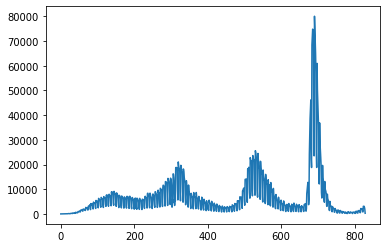

In [54]:
plt.plot(confirmed)
plt.show()

In [55]:
model = pm.auto_arima(confirmed, start_p=0, start_q=0,
                    test='kpss',
                    max_p=3, max_q=3,
                    m=1,
                    d=None,
                    trace=True,
                    error_action='ignore',
                    suppress_warnings=True,
                    stepwise=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=16476.915, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=16476.894, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=16468.406, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=16474.915, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=16378.464, Time=0.12 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=16284.761, Time=0.15 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=16341.149, Time=0.06 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=16286.191, Time=0.19 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=16257.507, Time=0.24 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=16259.502, Time=0.19 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=16258.460, Time=0.36 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=16187.779, Time=0.85 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=16116.767, Time=0.85 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=16287.622, Time=0.16 sec
 ARIMA(0,1,2)(0,0,0

In [56]:
# Forecast
n_periods = 24
fc = model.predict(n_periods=n_periods, return_conf_int=False)
index_of_fc = np.arange(len(confirmed), len(confirmed)+n_periods)

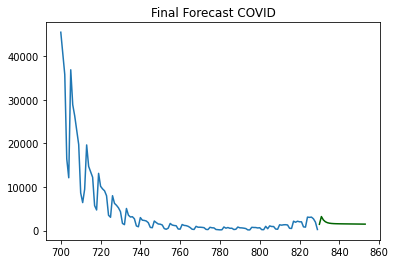

In [58]:
# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
# Plot
plt.plot(confirmed[700:])
plt.plot(fc_series, color='darkgreen')
plt.title("Final Forecast COVID")
plt.show()


In [59]:
model = pm.auto_arima(deaths, start_p=0, start_q=0,
                    test='kpss',
                    max_p=3, max_q=3,
                    m=1,
                    d=None,
                    trace=True,
                    error_action='ignore',
                    suppress_warnings=True,
                    stepwise=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=7972.271, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=7907.523, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=7914.200, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=7970.272, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=7909.515, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=7909.516, Time=0.12 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=7865.930, Time=0.31 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=7851.247, Time=0.58 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=7906.383, Time=0.16 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=7843.222, Time=0.47 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=7890.929, Time=0.44 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.99 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=7786.012, Time=0.57 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=7776.095, Time=0.35 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : 

In [62]:
# Forecast
n_periods = 30
fc = model.predict(n_periods=n_periods, return_conf_int=False)
index_of_fc = np.arange(len(deaths), len(deaths)+n_periods)

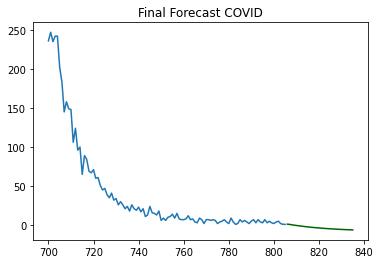

In [63]:
# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
# Plot
plt.plot(deaths[700:])
plt.plot(fc_series, color='darkgreen')
plt.title("Final Forecast COVID")
plt.show()

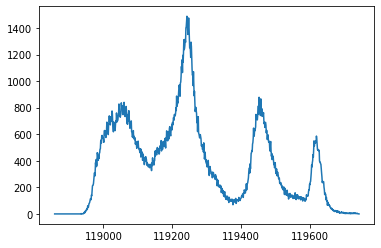

In [20]:
plt.plot(deaths)
plt.show()